## Primer Examen 10%
Un vehículo parte del reposo en un punto con una aceleración constante de $a_1$. 10 segundos después pasa por el mismo punto, y en la misma dirección, un segundo vehículo con una rapidez de 10 m/s y con aceleración constante $a_2$. Calcule el punto de encuentro: 
1. Gráficamente 
1. Encontrando las raíces del polinomio generado a partir de igualar las dos ecuaciones de movimiento.
1. Grafique el polinomio generado

_Ayuda:_
La ecuación de movimiento para el movimiento uniformemente acelerado es:
\begin{align}
x=x_0+v_0 (t-t_0)+\tfrac{1}{2} a (t-t_0)^2\,,
\end{align}
donde
* $x_0$ es la posición inicial
* $v_0$ es la rapidez inicial
* $t_0$ es el tiempo inicial

Ejecute la siguiente celda para fijar los valores de las aceleraciones en su caso

In [1]:
%pylab inline
import numpy as np
a1=np.random.choice([2,3,4])
a2=a1+4
print('a1={} m/s² and a2={} m/s²'.format(a1,a2))

Populating the interactive namespace from numpy and matplotlib
a1=4 m/s² and a2=8 m/s²


Como el vehículo 1 parte del reposo $v_{0}=0$, además supongamos que en $t=0$ parte del origen $x=0$, su ecuación de movimiento es $x_{1}=\frac{1}{2}a_{1}t^{2}=[2m/s^{2}]t^{2}$

In [124]:
x1=np.poly1d([1/2*a1,0,0])

Para el segundo vehículo se tiene que $x_{2}=\frac{1}{2}a_{2}(t-10)^{2}+v_{0}(t-10)+x_{0}$, pero se sabe que $v_{0}=10m/s$ y que en $t=10s$ su posición es la misma que tenía el vehículo 1 en $t=0$, esto es $x_{2}=0$; de aquí: $x_{2}=0=\frac{1}{2}[8m/s^{2}](10-10)^{2}+[10m/s](10-10)+x_{0}$, por lo cual para el segundo vehículo $x_{0}=0m$ y su ecuación de movimiento es: $[4m/s^{2}](t-10)^{2}+[10m/s](t-10)$

In [125]:
def x2(t):
    x=1/2*a2*(t-10)**2+10*(t-10)
    return x

Graficando ambas ecuaciones se tiene que el punto de encuentro de los dos vehículos está en $1700m-1900m$ en el tiempo próximo a $30s$

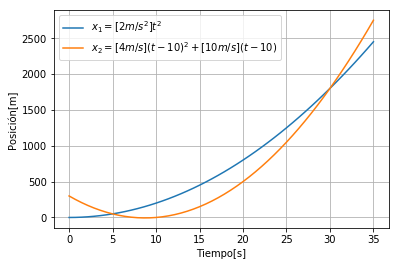

In [156]:
time=np.linspace(0,35)
plt.plot(time,x1(time),label='$x_{1}=[2m/s^{2}]t^{2}$')
plt.plot(time,x2(time),label='$x_{2}=[4m/s](t-10)^{2}+[10m/s](t-10)$')
plt.xlabel('Tiempo[s]')
plt.ylabel('Posición[m]')
plt.legend()
plt.grid()

Si se igualan las dos ecuaciones para hallar el punto de encuentro, teniendo en cuenta que para el segundo vehículo el tiempo empieza en $t=10s$ por lo que no se toma la parte de su gráfica antes de este tiempo, se obtine la siguiente ecuación:$[-2m/s^{2}]t^{2}+[70m/s]t-300m=0$

In [127]:
equal=np.poly1d([-2,70,-300])

In [128]:
from scipy import optimize

Resolviendo por métodos numéricos:

In [162]:
meet=optimize.newton(equal,30)
print("El punto de encuentro calculando las raices del polinomio es: t={}[s] en la posición: x={}[m]".format(meet,x1(meet)))

El punto de encuentro calculando las raices del polinomio es: t=30.0[s] en la posición: x=1800.0[m]


Si ahora se grafica el polinomio.

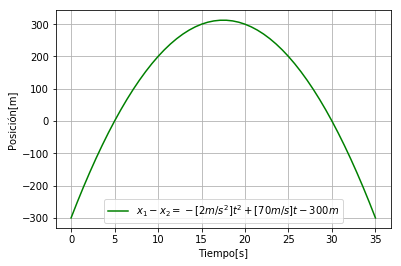

In [155]:
time2=np.linspace(0,35)
plt.plot(time2,equal(time2),'g',label='$x_{1}-x_{2}=-[2m/s^{2}]t^{2}+[70m/s]t-300m$')
plt.xlabel('Tiempo[s]')
plt.ylabel('Posición[m]')
plt.legend()
plt.grid()